In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline 

import pandas as pd
data = pd.read_csv('data/ex2data1.txt', sep=",", header = None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
X = data.loc[:,0:1].as_matrix()
y = data.loc[:,2].as_matrix()

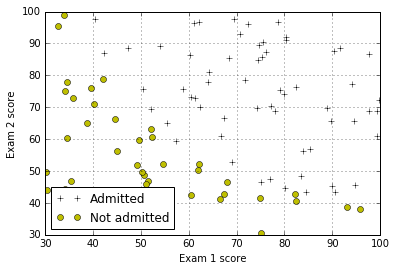

In [3]:
pos = np.where(y==1)[0]
nag = np.where(y==0)[0]
plt.plot(X[pos,0], X[pos,1], 'k+', label='Admitted')
plt.plot(X[nag,0], X[nag,1], 'ko', color='y', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc=0)
plt.grid(True)

In [4]:
X = np.column_stack((np.ones((X.shape[0],1)),X))
y = y.reshape(len(y),1)

In [5]:
def costFunction(theta, X, y):
    H = sigmoid(np.dot(X, np.c_[theta]))
    J = np.sum(np.multiply(-y, np.log(H)) - np.multiply((1 - y), np.log(1-H))) / len(X)
    
    grad = np.sum(np.dot((H - y).T, X), axis=0) / len(X)
    return J

In [6]:
def sigmoid(z):
    return 1 / (1 + math.e ** -z)

In [7]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)

In [8]:
cost

0.69314718055994529

In [9]:
from scipy import optimize

In [10]:
options = {'full_output': True, 'maxiter': 400}
theta, cost, _, _, _ = optimize.fmin(lambda t: costFunction(t, X, y), initial_theta, **options)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [11]:
theta

array([-25.16130062,   0.20623142,   0.20147143])

In [12]:
cost

0.20349770159021521

In [13]:
def plotDecisionBoundary(theta, X, y):
    plt.plot(X[pos,1], X[pos,2], 'k+', label='Admitted')
    plt.plot(X[nag,1], X[nag,2], 'ko', color='y', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(loc=0)
    plt.grid(True)

    if X.shape[1] <= 3:
        plot_x = np.r_[X[:,2].min()-2,  X[:,2].max()+2]
        plot_y = (-1./theta[2]) * (theta[1]*plot_x + theta[0])

        plt.plot(plot_x, plot_y)
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.axis([30, 100, 30, 100])
    else:
        pass

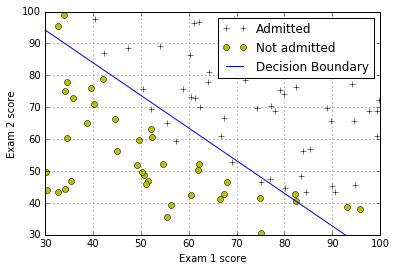

In [14]:
plotDecisionBoundary(theta, X, y)

In [15]:
prob = sigmoid(np.array([1, 45, 85]).dot(theta))

In [16]:
'For a student with scores 45 and 85, we predict an admission ' \
          'probability of %f' % prob

'For a student with scores 45 and 85, we predict an admission probability of 0.776292'

In [17]:
def predict(theta, X):
    return sigmoid(X.dot(np.c_[theta])) >= 0.5

In [18]:
p = predict(theta, X)

In [19]:
(p == y).mean() * 100

89.0

In [20]:
np.c_[theta].shape

(3, 1)

In [21]:
theta.shape

(3,)

In [22]:
np.asmatrix(theta).shape

(1, 3)

In [23]:
np.asmatrix(theta).T.shape

(3, 1)